In [1]:
# Bibliotecas python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re
%matplotlib inline

# Função para calcular moda.
from scipy import stats

# Formatação dos gráficos
from matplotlib.ticker import FuncFormatter
from matplotlib.legend import Legend

In [2]:
# Configurando o tema do gráfico
myrcs = {"axes.titleweight": "bold", "lines.markersize": 9.0, "lines.linewidth": 2.0,}
sns.set (style="whitegrid", font_scale=1.25, rc=myrcs)

# Linhas exibidas por padrão nos dataframes
pd.options.display.min_rows = 20

In [3]:
#Configurações
# A1 - com switch HW, não podendo aumentar/diminuir número de switches SW (número máximo de SW = 1)
# A2 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 2)
# A3 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 3)
# A4 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 4)
# A5 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 5)
# B - sem switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 5)
# D - com switch HW, não podendo aumentar/diminuir número de switches SW (número de SW fixo em 5)

#TODO:
#Nova configuração: E - sem switch HW, não podendo aumentar/diminuir número de switches SW (número de SW fixo em 5)

#Graficos em ingles
#Legenda: Carga = load; 50hosts=low; 100hosts=medium; 150=high
#SW=Software Switch; HW=Hardware Switch
#Eixo y (variavel (%) Ex: Load Usage (%))
#Experimento (eixo x) -> D = (HW = 1; SW = 5); B = (HW = 0; SW = 1-5); A5 = (HW = 1; SW = 1-5)
#Alterar Experimento->Configuration
#Block -> block ratio (mudar de 0-1 para 0-100)
#Drop -> drop ratio (mudar de 0-1 para 0-100)
#Grafico de vazao: Soma->Throughput (Gbps)
#Remover titulo de todos os graficos (usar uma variavel para controlar se imprime o titulo ou nao)

# Parâmetros que variam nesta simulação
seeds = [1,2,3,4]
cargas = ["50hosts", "100hosts", "150hosts"]
experimentos = ["e","b","d","a5"]

# Tempo total de simulação
t_sim = 2000

# Intervalo de confiança
confianca = 99

# Imprimir titulos nos gráficos
titulos = True

In [4]:
# Função para ler os arquivos de log
def mymode (series):
    return stats.mode (series)[0]

agg_map = {'SwAtivosAntes' : mymode, 'SwAtivosDepois' : np.mean, 'AvgCPULoad' : np.mean}

def read_df_decisao ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-logDecisaoSwitchesSW.log", sep='\s+', index_col=["TimeSec"])
                df_sed.append (df)
            #df_carga.append (pd.concat (df_sed).groupby (["TimeSec"]).agg (agg_map))
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Carga","Experimento","Seed","TimeSec"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

def read_df_statistics ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-statistics.log", sep='\s+', index_col=["TimeSec"])
                df_sed.append (df)
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Carga","Experimento","Seed","TimeSec"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

def read_df_hw ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-switch-stats-hw.log", sep='\s+', index_col=["TimeSec"])
                df_sed.append (df)
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Carga","Experimento","Seed","TimeSec"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

def read_df_sw ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            if(experimento[0] == "a"):
                numSW = int(experimento[1])
            else:
                numSW = 5
            df_sw = []
            for sw in range(1,numSW+1):
                df_sed = []
                for seed in seeds:
                    df = pd.read_csv ("saidas/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-switch-stats-sw"+str(sw)+".log", sep='\s+', index_col=["TimeSec"])
                    df_sed.append (df)
                df_sw.append(pd.concat (df_sed, keys=seeds))
            df_exp.append(pd.concat(df_sw, keys=range(1,numSW+1)))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Carga","Experimento","NumSW","Seed","TimeSec"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

def read_df_ping ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-pingHW.log", sep='\s+', index_col=["seq"])
                df['Switch'] = "HW"
                df_sed.append (df)
                df = pd.read_csv ("saidas/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-pingSW.log", sep='\s+', index_col=["seq"])
                df['Switch'] = "SW"
                df_sed.append (df)
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Carga","Experimento","Seed","TimeSec"], copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read

def read_df_iperfs ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-iperfs.log", sep='\s+')
                df_sed.append (df)
            #df_carga.append (pd.concat (df_sed).groupby (["TimeSec"]).agg (agg_map))
            df_exp.append(pd.concat (df_sed))
        df_carga.append (pd.concat (df_exp))
    df_read = pd.concat (df_carga, keys=cargas, copy=False)
    df_read.rename({"50hosts": "Low", "100hosts": "Medium", "150hosts": "High"}, inplace=True)
    return df_read


In [5]:
df_sw = read_df_sw()
df_sw = df_sw.loc[(df_sw["LoaKbps"]!=0)]
df_sw["%drop"] = df_sw["LoaDrps"]/(df_sw["Packets"]+df_sw["LoaDrps"])
df_sw

LoaKbps  LoaUsag  Packets  DlyUsec  \
Carga Experimento NumSW Seed TimeSec                                          
Low   e           1     1    2.0        1933.536        0      160      426   
                             3.0        7628.512        1      629      571   
                             4.0       13276.688        2     1095      655   
                             5.0       19571.120        3     1614      695   
                             6.0       28012.208        4     2310      748   
                             7.0       35389.504        5     2918      794   
                             8.0       40895.616        5     3372      799   
                             9.0       45391.632        6     3743      799   
                             10.0      50573.760        7     4170      799   
                             11.0      55182.400        7     4550      799   
...                                          ...      ...      ...      ...   
High  a5          5     4    112.0    403098.336       54    33237     1300   
                             113.0    395312.160       53    32595     1300   
                             114.0    385621.888       51    31796     1300   
                             115.0    377250.096       50    31106     1300   
                             116.0    369512.432       49    30468     1300   
                             117.0    362757.136       48    29911     1300   
                             118.0    352912.672       47    29099     1300   
                             119.0    341087.872       45    28124     1300   
                             120.0    333701.920       44    27515     1300   
                             121.0    304958.560       41    25145     1300   

                                      LoaDrps  MetDrps  TabDrps  FloMods  \
Carga Experimento NumSW Seed TimeSec                                       
Low   e           1     1    2.0            0        0        0       21   
                             3.0            0        0        0       26   
                             4.0            0        0        0       26   
                             5.0            0        0        0       30   
                             6.0            0        0        0       33   
                             7.0            0        0        0       26   
                             8.0            0        0        0       25   
                             9.0            0        0        0       20   
                             10.0           0        0        0       26   
                             11.0           0        0        0       23   
...                                       ...      ...      ...      ...   
High  a5          5     4    112.0          0        0        0        0   
                             113.0          0        0        0        0   
                             114.0          0        0        0        0   
                             115.0          0        0        0        0   
                             116.0          0        0        0        0   
                             117.0          0        0        0        0   
                             118.0          0        0        0        0   
                             119.0          0        0        0        0   
                             120.0          0        0        0        0   
                             121.0          0        0        0       64   

                                      MetMods  GroMods  ...  FloUsag  MetEntr  \
Carga Experimento NumSW Seed TimeSec                    ...                     
Low   e           1     1    2.0            0        0  ...        0        0   
                             3.0            0        0  ...        0        0   
                             4.0            0        0  ...        1        0   
                             5.0            0        0  ...        1 

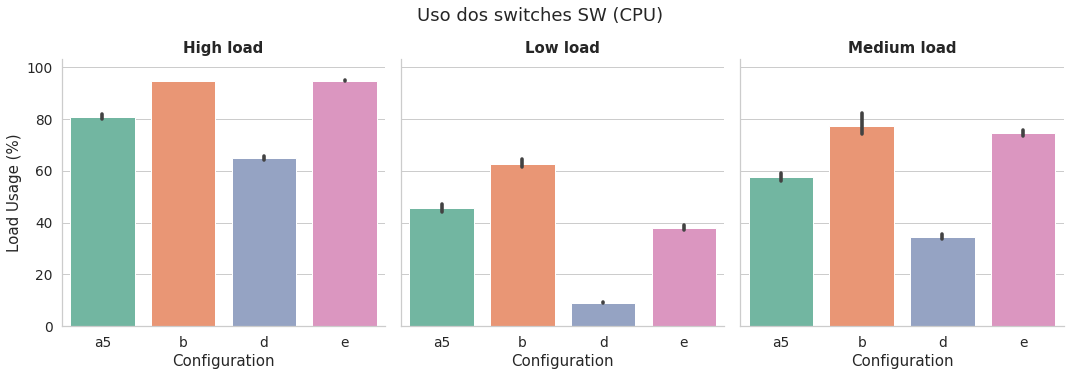

In [6]:
df_sw = df_sw.query("TimeSec > 200 and TimeSec < 400").groupby(["Carga", "Experimento", "Seed"]).mean()
df_sw.reset_index(inplace=True)
snsplt = sns.catplot(palette="Set2", x="Experimento", y="LoaUsag", kind="bar", 
                      ci=confianca, data=df_sw, col="Carga")
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "Load Usage (%)")
if (titulos):
    snsplt.fig.suptitle('Uso dos switches SW (CPU)', y=1.05)
snsplt.set(ylim=(0,103))

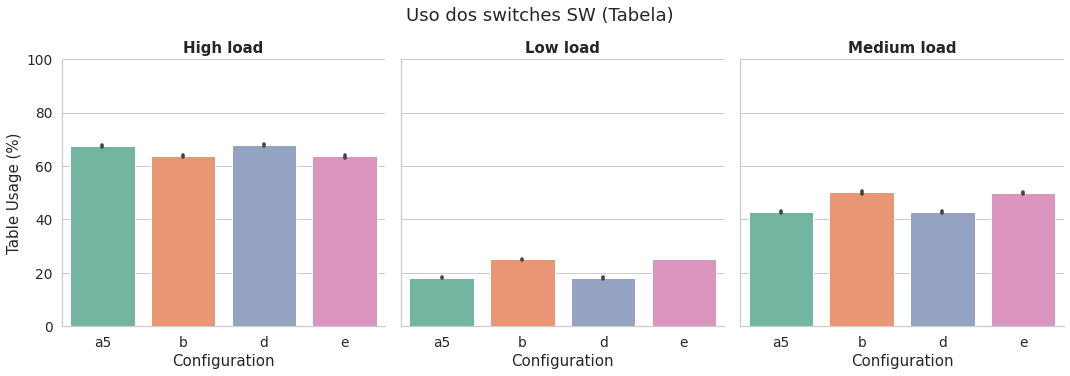

In [7]:
snsplt = sns.catplot(palette="Set2", x="Experimento", y="FloUsag", kind="bar", 
                      ci=95, data=df_sw, col="Carga")
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "Table Usage (%)")
if (titulos):
    snsplt.fig.suptitle('Uso dos switches SW (Tabela)', y=1.05)
snsplt.set(ylim=(0,100))

In [8]:
df_decisao = read_df_decisao()
df_decisao

SwAtivosAntes  AvgCPULoad  Decisão  \
Carga Experimento Seed TimeSec                                       
Low   e           1    0.0                  5       0.000  Manteve   
                       15.0                 5       0.103  Manteve   
                       30.0                 5       0.181  Manteve   
                       45.0                 5       0.265  Manteve   
                       60.0                 5       0.320  Manteve   
                       75.0                 5       0.348  Manteve   
                       90.0                 5       0.372  Manteve   
                       105.0                5       0.378  Manteve   
                       120.0                5       0.385  Manteve   
                       135.0                5       0.382  Manteve   
...                                       ...         ...      ...   
High  a5          4    1860.0               1       0.000  Manteve   
                       1875.0               1       0.000  Manteve   
                       1890.0               1       0.000  Manteve   
                       1905.0               1       0.000  Manteve   
                       1920.0               1       0.000  Manteve   
                       1935.0               1       0.000  Manteve   
                       1950.0               1       0.000  Manteve   
                       1965.0               1       0.000  Manteve   
                       1980.0               1       0.000  Manteve   
                       1995.0               1       0.000  Manteve   

                                SwAtivosDepois  
Carga Experimento Seed TimeSec                  
Low   e           1    0.0                   5  
                       15.0                  5  
                       30.0                  5  
                       45.0                  5  
                       60.0                  5  
                       75.0                  5  
                       90.0                  5  
                       105.0                 5  
                       120.0                 5  
                       135.0                 5  
...                                        ...  
High  a5          4    1860.0                1  
                       1875.0                1  
                       1890.0                1  
                       1905.0                1  
                       1920.0                1  
                       1935.0                1  
                       1950.0                1  
                       1965.0                1  
                       1980.0                1  
                       1995.0                1  

[6205 rows x 4 columns]

In [9]:
df_decisao = df_decisao.query("TimeSec > 200 and TimeSec < 400").groupby(["Carga", "Experimento", "Seed"]).mean()
df_decisao.reset_index(inplace=True)
#df_decisao.replace({"Experimento":{"a":1,"b":2,"c":3,"d":4}}, inplace=True)
# df_decisao

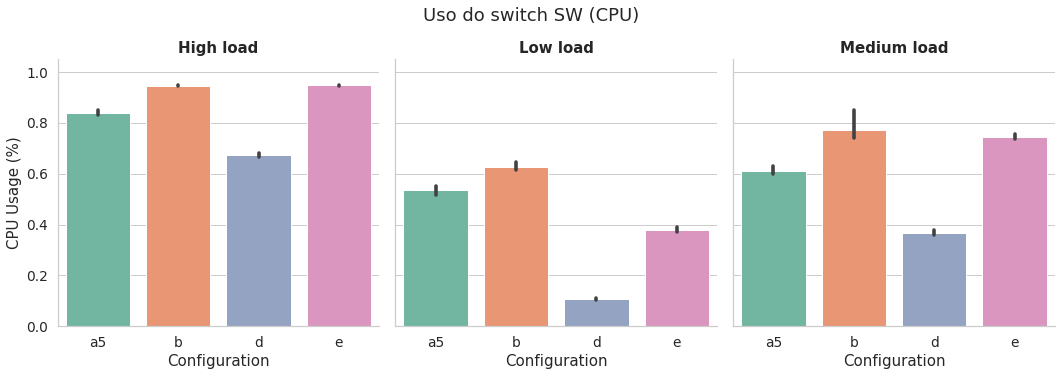

In [10]:
snsplt = sns.catplot(palette="Set2", x="Experimento", y="AvgCPULoad", kind="bar", 
                      ci=confianca, data=df_decisao, col="Carga")
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "CPU Usage (%)")
if (titulos):
    snsplt.fig.suptitle('Uso do switch SW (CPU)', y=1.05)
snsplt.set(ylim=(0,1.05))

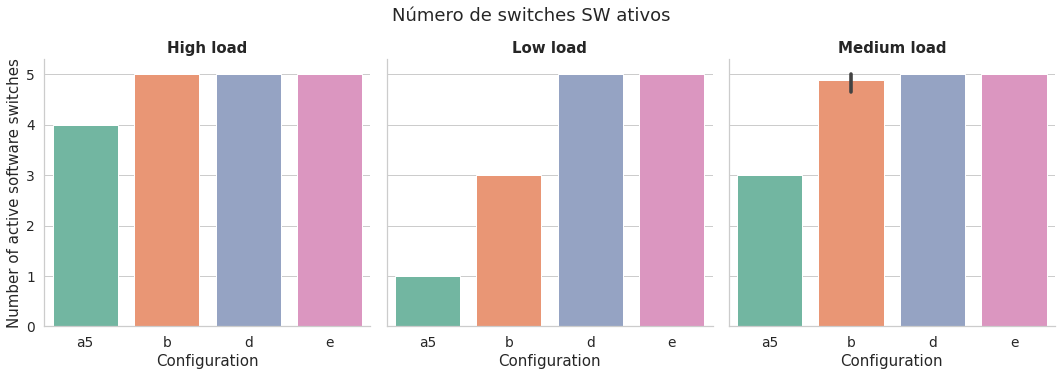

In [11]:
snsplt = sns.catplot(palette="Set2", x="Experimento", y="SwAtivosDepois", kind="bar", 
                      ci=confianca, data=df_decisao, col="Carga")
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "Number of active software switches")
if (titulos):
    snsplt.fig.suptitle('Número de switches SW ativos', y=1.05)
snsplt.set(ylim=(0,5.3), yticks=(0,1,2,3,4,5))

In [12]:
df_stats = read_df_statistics()
#df_stats.drop(columns=["AvgLoad"], inplace=True)
#df_stats.rename(columns={"SW": "SWAtivos", "Ativos": "AvgLoad"}, inplace=True)
df_stats

RegrasAceitas  RegrasBloqueadas  SWAtivos  \
Carga Experimento Seed TimeSec                                              
Low   e           1    1.0                  0                 0         5   
                       2.0                 21                 0         5   
                       3.0                 26                 0         5   
                       4.0                 26                 0         5   
                       5.0                 30                 0         5   
                       6.0                 33                 0         5   
                       7.0                 26                 0         5   
                       8.0                 25                 0         5   
                       9.0                 20                 0         5   
                       10.0                26                 0         5   
...                                       ...               ...       ...   
High  a5          4    1991.0               0                 0         1   
                       1992.0               0                 0         1   
                       1993.0               0                 0         1   
                       1994.0               0                 0         1   
                       1995.0               0                 0         1   
                       1996.0               0                 0         1   
                       1997.0               0                 0         1   
                       1998.0               0                 0         1   
                       1999.0               0                 0         1   
                       2000.0               0                 0         1   

                                AvgLoad  
Carga Experimento Seed TimeSec           
Low   e           1    1.0        0.000  
                       2.0        0.005  
                       3.0        0.013  
                       4.0        0.020  
                       5.0        0.030  
                       6.0        0.041  
                       7.0        0.050  
                       8.0        0.057  
                       9.0        0.064  
                       10.0       0.070  
...                                 ...  
High  a5          4    1991.0     0.000  
                       1992.0     0.000  
                       1993.0     0.000  
                       1994.0     0.000  
                       1995.0     0.000  
                       1996.0     0.000  
                       1997.0     0.000  
                       1998.0     0.000  
                       1999.0     0.000  
                       2000.0     0.000  

[92957 rows x 4 columns]

In [13]:
df_stats_bloq = df_stats[["RegrasBloqueadas", "RegrasAceitas"]].query("TimeSec > 200 and TimeSec < 400").groupby(["Carga", "Experimento", "Seed"]).sum()
df_stats_bloq.reset_index(inplace=True)
df_stats_bloq["block"] = df_stats_bloq["RegrasBloqueadas"]/(df_stats_bloq["RegrasAceitas"]+df_stats_bloq["RegrasBloqueadas"])
# df_stats_bloq

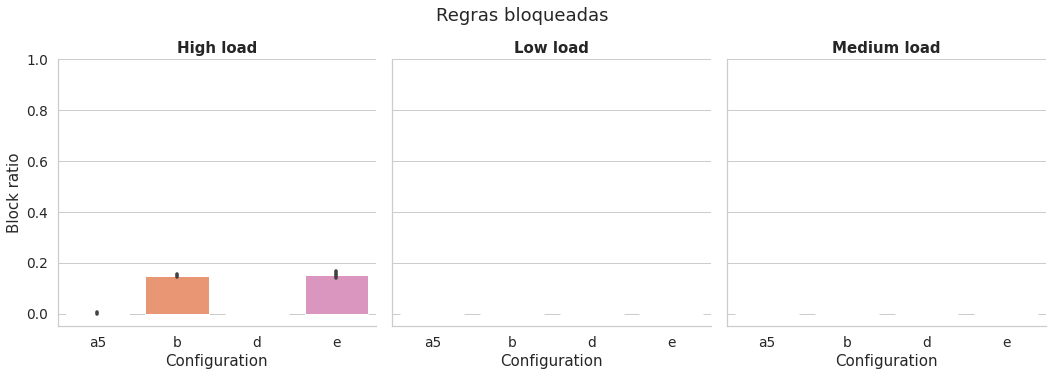

In [14]:
snsplt = sns.catplot(palette="Set2", x="Experimento", y="block", kind="bar", 
                      ci=confianca, data=df_stats_bloq, col="Carga")
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "Block ratio")
if (titulos):
    snsplt.fig.suptitle('Regras bloqueadas', y=1.05)
snsplt.set(ylim=(-0.05,1))

In [15]:
df_hw = read_df_hw()
df_hw

LoaKbps  LoaUsag  Packets  DlyUsec  LoaDrps  \
Carga Experimento Seed TimeSec                                                
Low   e           1    1.0        0.000        0        0       34        0   
                       2.0       17.312        0        2       39        0   
                       3.0       17.312        0        2       39        0   
                       4.0       17.312        0        2       39        0   
                       5.0       17.312        0        2       39        0   
                       6.0       17.312        0        2       40        0   
                       7.0       17.312        0        2       40        0   
                       8.0       17.312        0        2       40        0   
                       9.0       17.312        0        2       40        0   
                       10.0      17.312        0        2       40        0   
...                                 ...      ...      ...      ...      ...   
High  a5          4    1991.0    17.312        0        2       40        0   
                       1992.0    17.312        0        2       40        0   
                       1993.0    17.312        0        2       40        0   
                       1994.0    17.312        0        2       40        0   
                       1995.0    17.312        0        2       40        0   
                       1996.0    17.312        0        2       40        0   
                       1997.0    17.312        0        2       40        0   
                       1998.0    17.312        0        2       40        0   
                       1999.0    17.312        0        2       40        0   
                       2000.0     0.000        0        0       40        0   

                                MetDrps  TabDrps  FloMods  MetMods  GroMods  \
Carga Experimento Seed TimeSec                                                
Low   e           1    1.0            0        0        3        0        2   
                       2.0            0        0        0        0        0   
                       3.0            0        0        0        0        0   
                       4.0            0        0        0        0        0   
                       5.0            0        0        0        0        0   
                       6.0            0        0        0        0        0   
                       7.0            0        0        0        0        0   
                       8.0            0        0        0        0        0   
                       9.0            0        0        0        0        0   
                       10.0           0        0        0        0        0   
...                                 ...      ...      ...      ...      ...   
High  a5          4    1991.0         0        0        0        0        0   
                       1992.0         0        0        0        0        0   
                       1993.0         0        0        0        0        0   
                       1994.0         0        0        0        0        0   
                       1995.0         0        0        0        0        0   
                       1996.0         0        0        0        0        0   
                       1997.0         0        0        0        0        0   
                       1998.0         0        0        0        0        0   
                       1999.0         0        0        0        0        0   
                       2000.0         0        0        0        0        0   

                                ...  FloEntr  FloUsag  MetEntr  MetUsag  \
Carga Experimento Seed TimeSec  ...                                       
Low   e           1    1.0      ...        3        0        0        0   
                       2.0      ...        3        0        0        0   
                       3.0      ...        3        0        0        0   
                     

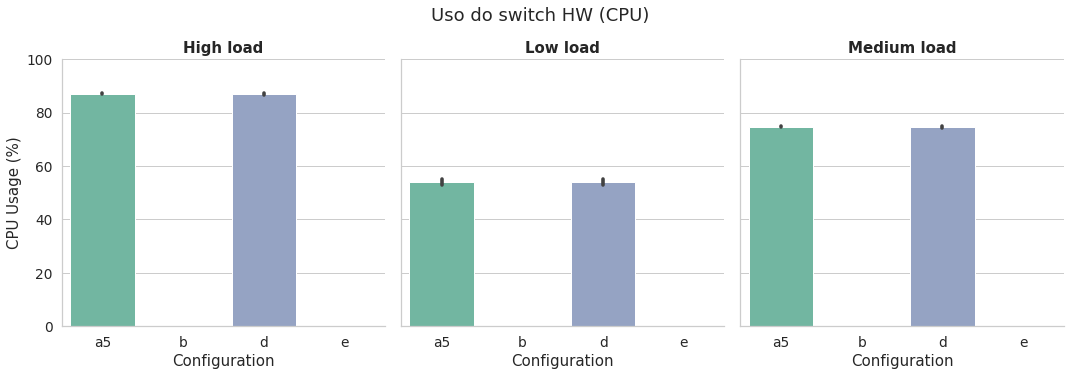

In [16]:
df_hw = df_hw.query("TimeSec > 200 and TimeSec < 400").groupby(["Carga", "Experimento", "Seed"]).mean()
df_hw.reset_index(inplace=True)
# df_hw
snsplt = sns.catplot(palette="Set2", x="Experimento", y="LoaUsag", kind="bar", 
                      ci=confianca, data=df_hw, col="Carga")
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "CPU Usage (%)")
if (titulos):
    snsplt.fig.suptitle('Uso do switch HW (CPU)', y=1.05)
snsplt.set(ylim=(0,100))

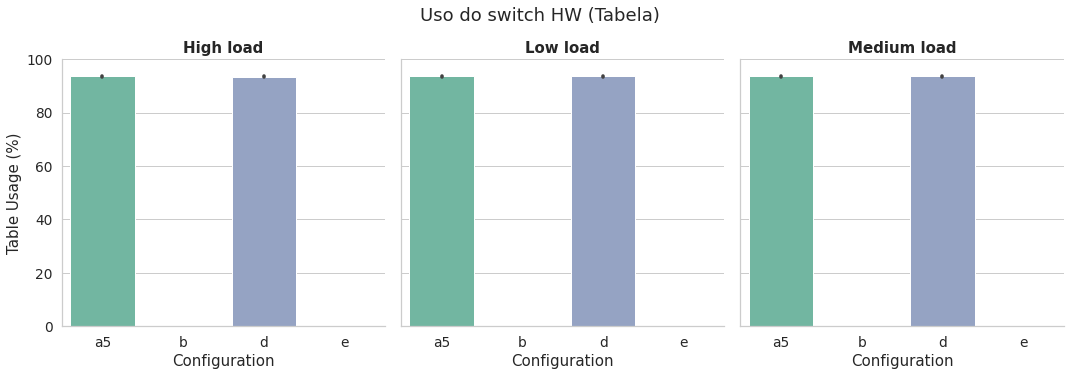

In [17]:
snsplt = sns.catplot(palette="Set2", x="Experimento", y="FloUsag", kind="bar", 
                      ci=confianca, data=df_hw, col="Carga")
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "Table Usage (%)")
if (titulos):
    snsplt.fig.suptitle('Uso do switch HW (Tabela)', y=1.05)
snsplt.set(ylim=(0,100))

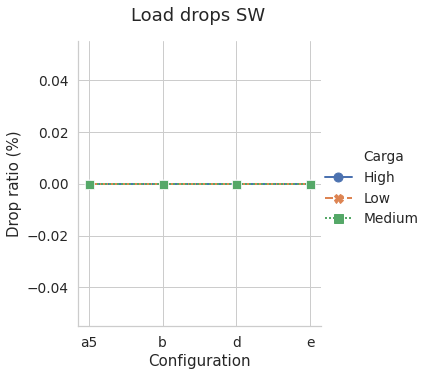

In [18]:
snsplt = sns.relplot(x="Experimento", y="%drop",
            hue="Carga",
            kind="line", legend="full", data=df_sw, ci=95, style="Carga", markers=True)
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "Drop ratio (%)")
if (titulos):
    snsplt.fig.suptitle('Load drops SW', y=1.05)
#snsplt.set(xlim=(0,600))

In [19]:
#Lendo os arquivos de ping
df_pingstats = read_df_ping()
df_pingstats = df_pingstats.query("TimeSec > 200 and TimeSec < 400")
df_pingstats.rename(columns={"time": "Ping"}, inplace=True)
df_pingstats.reset_index(inplace=True)
df_pingstats

,Carga,Experimento,Seed,TimeSec,Ping,Switch
0,Low,e,1,201,0.62692,HW
1,Low,e,1,202,0.62692,HW
2,Low,e,1,203,0.62692,HW
3,Low,e,1,204,0.62692,HW
4,Low,e,1,205,0.62692,HW
5,Low,e,1,206,0.62692,HW
6,Low,e,1,207,0.62692,HW
7,Low,e,1,208,0.62692,HW
8,Low,e,1,209,0.62692,HW
9,Low,e,1,210,0.62692,HW


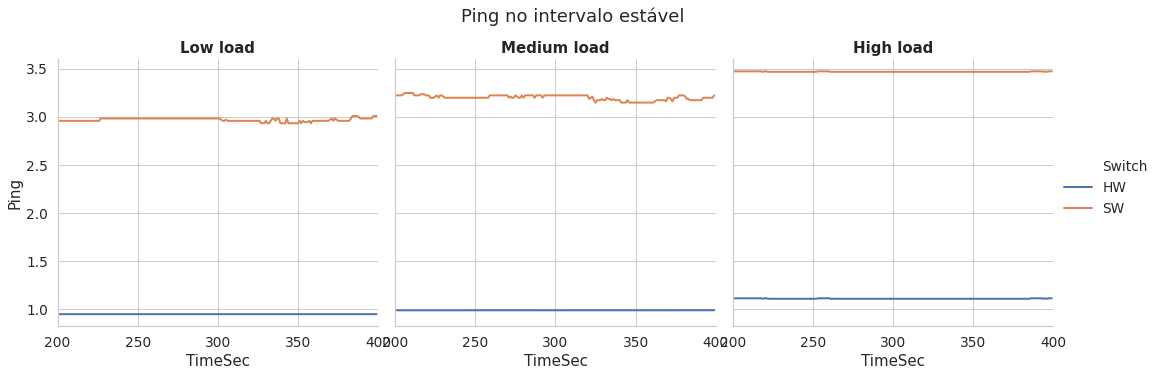

In [20]:
snsplt = sns.relplot(x="TimeSec", y="Ping",
           hue="Switch", col="Carga",
           kind="line", legend="full", data=df_pingstats, ci=None)
snsplt.fig.suptitle('Ping no intervalo estável', y=1.05)
snsplt.set_titles("{col_name} load")
snsplt.set(xlim=(200,400))

In [21]:
df_iperfs = read_df_iperfs()
df_iperfs

Inicio(seg)  Duracao(seg)  Banda(Kbps)     PCli    PServ
Low  0            1.064        47.099      327.505  10000.0  30000.0
     1            1.094        72.394      392.705  10000.0  30000.0
     2            1.114        78.477      981.479  10000.0  30000.0
     3            1.122        38.182      150.845  10000.0  30000.0
     4            1.195        68.967      478.772  10000.0  30000.0
     5            1.201        56.087       89.123  10000.0  30000.0
     6            1.221        45.372      962.763  10000.0  30000.0
     7            1.225        16.846      770.790  10000.0  30000.0
     8            1.269         8.686     1613.628  10000.0  30000.0
     9            1.276        98.467      432.608  10001.0  30001.0
...                 ...           ...          ...      ...      ...
High 37490      557.273        63.140      546.625  10245.0  30245.0
     37491      557.279        57.272      174.438  10247.0  30247.0
     37492      560.403        27.330      396.077  10248.0  30248.0
     37493      560.712        31.001      320.305  10246.0  30246.0
     37494      561.109        34.415     2217.728  10247.0  30247.0
     37495      561.712        54.230      317.595  10249.0  30249.0
     37496      564.778        70.231      924.172  10248.0  30248.0
     37497      565.280        73.799     1395.357  10249.0  30249.0
     37498      565.474        27.643     2642.320  10248.0  30248.0
     37499      565.743        90.206     1171.210  10249.0  30249.0

[1346028 rows x 5 columns]

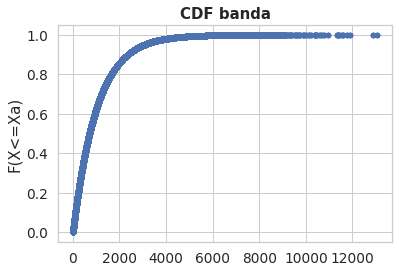

In [22]:
x = np.sort(df_iperfs['Banda(Kbps)'])
y = np.arange(1, len(x)+1) / float(len(x))
grafico = plt.plot(x,y,marker='.', linestyle='none')
grafico = plt.xlabel(u"")
grafico = plt.ylabel("F(X<=Xa)")
grafico = plt.title("CDF banda")
plt.show()

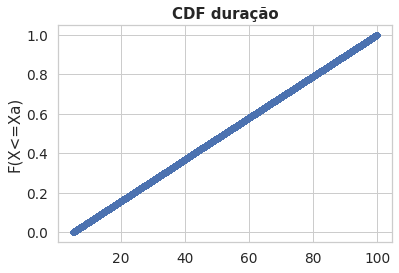

In [23]:
x = np.sort(df_iperfs['Duracao(seg)'])
y = np.arange(1, len(x)+1) / float(len(x))
grafico = plt.plot(x,y,marker='.', linestyle='none')
grafico = plt.xlabel(u"")
grafico = plt.ylabel("F(X<=Xa)")
grafico = plt.title("CDF duração")
plt.show()

In [24]:
df_sw = read_df_sw()
df_sw = df_sw.query("TimeSec > 200 and TimeSec < 400")[["LoaKbps","Packets"]]
df_sw = df_sw.loc[(df_sw["Packets"]!=0)]
df_sw = df_sw.groupby(["Carga", "Experimento", "NumSW", "Seed"]).mean()[["LoaKbps"]]
df_sw = df_sw.groupby(["Carga", "Experimento", "Seed"]).sum()
df_sw = df_sw.rename(columns={"LoaKbps" : "LoaKbpsSW"})
#df_sw.reset_index(inplace = True)

df_hw = read_df_hw()
df_hw = df_hw.query("TimeSec > 200 and TimeSec < 400")[["LoaKbps","Packets"]]
df_hw = df_hw.loc[(df_hw["Packets"]!=0)]
df_hw = df_hw.groupby(["Carga", "Experimento", "Seed"]).mean()[["LoaKbps"]]
df_hw = df_hw.rename(columns={"LoaKbps" : "LoaKbpsHW"})
#df_hw.reset_index(inplace = True)

df_total = pd.concat([df_sw, df_hw], axis=1)
df_total["Soma"] = df_total["LoaKbpsSW"] + df_total["LoaKbpsHW"]
df_total.reset_index(inplace = True)

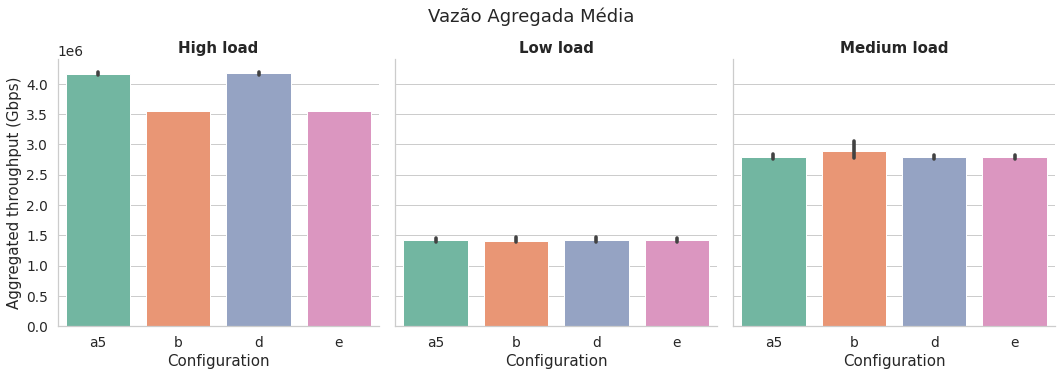

In [25]:
snsplt = sns.catplot(palette="Set2", x="Experimento", y="Soma", kind="bar", 
                      ci=confianca, data=df_total, col="Carga")
snsplt.set_titles("{col_name} load")
snsplt.set_axis_labels("Configuration", "Aggregated throughput (Gbps)")
if (titulos):
    snsplt.fig.suptitle('Vazão Agregada Média', y=1.05)
#snsplt.set(ylim=(0,1.05))"